In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

#Standard Scaler
##Purpose:
Standardizing data helps ensure that features with larger scales don't dominate the learning process in machine learning algorithms.
##How it works:

* It then subtracts the mean from each value and divides by the standard deviation.
*   The StandardScaler calculates the mean and standard deviation of each feature in the training data.
*   This results in a dataset where each feature has a mean of 0 and a standard deviation of 1.


##Benefits:
* Improved Algorithm Performance: Many machine learning algorithms, like those based on distance (e.g., k-NN, SVM), or gradient descent (e.g., Logistic Regression, Linear Regression), perform better when features are on a similar scale.
* Faster Convergence: Standardization can help algorithms converge faster during training.
* Equal Contribution of Features: When features are standardized, they contribute equally to the model, preventing features with large scales from overpowering others.
##When to use it:
* When your dataset contains features with different scales.
* When you are using algorithms that are sensitive to the scale of the data.
* When you want to ensure that all features contribute equally to the model.
##Example:
* Imagine a dataset with features like "age" (ranging from 20 to 70) and "salary" (ranging from 10,000 to 80,000).
* StandardScaler would transform these features to have a mean of 0 and a standard deviation of 1, making them comparable.

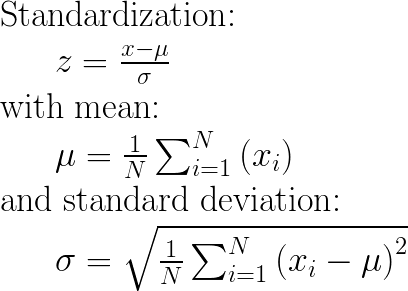

In [3]:
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [5]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# number of rows and columns in our dataset
diabetes_dataset.shape

(768, 9)

In [7]:
#getting the statistical measures of the entire dataset
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# checking how, how varied is our target variable(i.e how many patients are diabetic)
diabetes_dataset['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


##Here,
0 --> Non Diabetic Patients

1 --> Diabetic Patients

In [9]:
diabetes_dataset.info() #Exploring the datatypes and Non-null Counts for each col

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [11]:
# seperating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis = 1)
Y = diabetes_dataset['Outcome']

In [13]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [14]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


## Data Standardization
Standardizing data helps ensure that features with larger scales don't dominate the learning process in machine learning algorithms.

In [16]:
scaler = StandardScaler()
scaler.fit(X)


StandardScaler()

In [18]:
standardized_data = scaler.transform(X)  #Instead od fitting and transforming the data in two lines we could have done that in one line using standardized_data = scaler.fit_transform(x)

## 1. scaler = StandardScaler()
* Purpose: This line creates an instance of the StandardScaler class from sklearn.preprocessing.

* What it does: The StandardScaler is used to standardize (or normalize) features by removing the mean and scaling to unit variance. This means that each feature will have a mean of 0 and a standard deviation of 1, which is essential for many machine learning algorithms to perform effectively.

## 2. scaler.fit(X)
* Purpose: This line computes the mean and standard deviation for each feature in the dataset X (which is typically a 2D array of data, like a pandas DataFrame or a numpy array).

* What it does: The fit() method calculates the statistics (mean and standard deviation) needed to scale the features. It "learns" the parameters (mean, standard deviation) from the data so it can later transform the data using these values.

##3. standardized_data = scaler.transform(X)
* Purpose: This line applies the scaling to the dataset X using the mean and standard deviation that were calculated in the previous step.

* What it does: The transform() method scales the features of X by subtracting the mean and dividing by the standard deviation (i.e., standardization). The result is the transformed data stored in standardized_data, where each feature now has a mean of 0 and a standard deviation of 1.

In [19]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [20]:
X = standardized_data
Y = diabetes_dataset['Outcome'] #Unchanged can be ignored

In [21]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [24]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the Model

In [29]:
classifier = svm.SVC(kernel='linear')

In [30]:
#Trainig the support vector Machine Classifier
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Score

In [31]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)
print('Accuracy score of the training data : ',training_data_accuracy)

Accuracy score of the training data :  0.7866449511400652


In [32]:
#Accuracy on test Data
x_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(x_test_prediction,Y_test)
print('Accuracy score of the test data : ',test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


Making a predicting system

In [35]:
input_data=(2,197,70,45,543,30.5,0.158,53)
# the above is a list and we will change it to np array as its processingf is faST
input_data_as_np_array = np.asarray(input_data)
# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_np_array.reshape(1,-1)
input_data_standardized = scaler.transform(input_data_reshaped)
print(input_data_standardized)

[[-0.54791859  2.38188392  0.04624525  1.53455054  4.02192191 -0.18943689
  -0.94794368  1.68125866]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [37]:
input_data_prediction = classifier.predict(input_data_standardized)
print(input_data_prediction)

if input_data_prediction[0] == 0:
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic
